In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 97% 144M/149M [00:01<00:00, 118MB/s]
100% 149M/149M [00:01<00:00, 130MB/s]


In [ ]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
from keras.models import Model
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
train_dir = '/content/Training'
test_dir = '/content/Testing'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        '/content/Training',
        batch_size = 1,
        target_size=(100, 100),
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/content/Testing',
        batch_size = 1,
        target_size=(100, 100),
        class_mode='binary')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


(512, 512, 3)

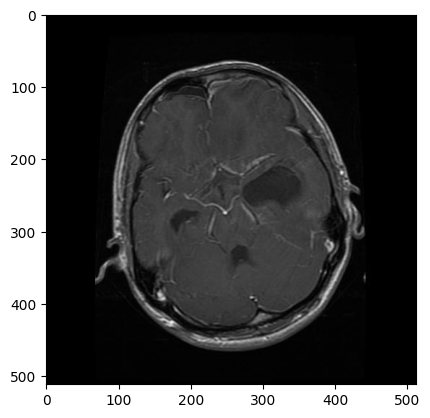

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("/content/Testing/glioma/Te-glTr_0008.jpg")
plt.imshow(image)
image.shape

In [ ]:
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3))
model = Model(inputs = base_model.input, outputs = base_model.get_layer("fc1").output)

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
 def extract_features(train_dir, model):
    features = []
    labels = []
    class_names = sorted(os.listdir(train_dir))
    label_dict = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(train_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
            img_array = np.expand_dims(img_array, axis=0)
            features.append(model.predict(img_array))
            labels.append(label_dict[class_name])

    return np.vstack(features), np.array(labels)

features, labels = extract_features(train_dir, model)

def flatten_features(features):
    return features.reshape(features.shape[0], -1)

features = flatten_features(features)
print("Feature vector dimensions: ",features.shape)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 525ms/step


In [ ]:
clf = svm.SVC(kernel='rbf')

combined_data = np.column_stack((features,labels))

np.random.shuffle(combined_data)

features = combined_data[:, :-1]
labels = combined_data[:, -1]

split_ratio = 0.80
split_idx = int(len(features) * split_ratio)
train_features, test_features = features[:split_idx], features[split_idx:]
train_labels, test_labels = labels[:split_idx], labels[split_idx:]


clf.fit(train_features, train_labels)

# Make predictions on the test set
predictions = clf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.66%


In [ ]:
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3))
model = Model(inputs = base_model.input, outputs = base_model.get_layer("fc2").output)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
 def extract_features(train_dir, model):
    features = []
    labels = []
    class_names = sorted(os.listdir(train_dir))
    label_dict = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(train_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
            img_array = np.expand_dims(img_array, axis=0)
            features.append(model.predict(img_array))
            labels.append(label_dict[class_name])

    return np.vstack(features), np.array(labels)

features, labels = extract_features(train_dir, model)

def flatten_features(features):
    return features.reshape(features.shape[0], -1)

features = flatten_features(features)
print("Feature vector dimensions: ",features.shape)

1/1 [==============================] - 1s 589ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

combined_data = np.column_stack((features,labels))

np.random.shuffle(combined_data)

features = combined_data[:, :-1]
labels = combined_data[:, -1]

split_ratio = 0.80
split_idx = int(len(features) * split_ratio)
train_features, test_features = features[:split_idx], features[split_idx:]
train_labels, test_labels = labels[:split_idx], labels[split_idx:]

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(train_features, train_labels)

y_pred = rf_classifier.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.64%
